In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
%matplotlib inline

/home/kopita/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST dataset

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train[0]

5

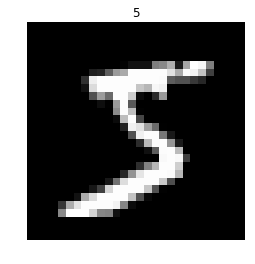

In [13]:
# Mostramos el número
plt.imshow(x_train[0], 'gray')
plt.title(y_train[0])
plt.axis('off');

## Preprocess

In [8]:
# los valores oscilan entre 0 y 255
x_train.min(), x_train.max()

(0, 255)

In [9]:
# Preprocesamos las imagenes para que los valores varien
# entre -1 y 1
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5
x_train.min(), x_train.max()

(-1.0, 1.0)

In [14]:
x_train.shape

(60000, 28, 28)

In [16]:
# Las dimensiones de las imagenes es de 28x28, y para poder utilizar
# capas full conectadas, necesitamos representar los valores en una
# sola dimensión, es decir, una dimensión de 784 valores (28x28)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

x_train.shape, y_train.shape

((60000, 784), (60000,))

## One-hot encode

In [17]:
y_train[0]

5

In [18]:
# Usamos la función "to_categorical" para llevar el valor 5 a un vector
# con 10 valores (el número de clases)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Construyendo el modelo en Keras

In [19]:
model = Sequential()

model.add(Dense(10, activation='softmax', input_shape=(784,)))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01), # <--- learning rate
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/step - loss: 1.0210 - acc: 0.7193 - val_loss: 0.6130 - val_acc: 0.8413
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.5616 - acc: 0.8528 - val_loss: 0.4834 - val_acc: 0.8710
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.4773 - acc: 0.8703 - val_loss: 0.4310 - val_acc: 0.8830
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.4365 - acc: 0.8793 - val_loss: 0.4013 - val_acc: 0.8904
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.4116 - acc: 0.8856 - val_loss: 0.3827 - val_acc: 0.8944


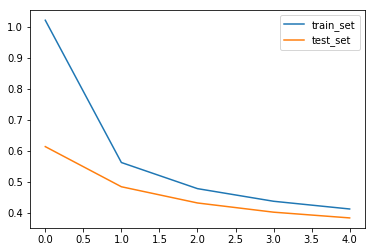

In [26]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend();

* Experimenta el efecto del learning rate.
* Aumenta capas a la red.